# Aufgabe 33: Zwei Histogramme
### a) 
Die Zählraten der einzelnen Bins folgen der Poissonverteilung. Der Erwartungswert pro Bin ist jeweils $N\cdot p_i$ bzw. $M\cdot p_i$. 

Nullhypothese: Beide Histogramme repräsentieren Zufallszahlen der gleichen Verteilung.  
Also sind die PDFs der Bins der jeweiligen Histogramme
$$ \frac{\exp(-Np_i)(Np_i)^{n_i}}{n_i!} $$ bzw. $$ \frac{\exp(-Mp_i)(Mp_i)^{m_i}}{m_i!} $$

### b)
Die Likelihoodfunktion für die Nullhypothese lautet:
$$ L({p_i}) = \frac{\exp(-N{p}_i)(N{p}_i)^{n_i}}{n_i!} \cdot \frac{\exp(-M{p}_i)(M{p}_i)^{m_i}}{m_i!} $$

Die Log-Likelihood-Funktion lautet:
$$ \log(L(p_i)) = -N{p}_i - M{p}_i + n_i\cdot\log(Np_i) + m_i\cdot\log(Mp_i) - \log(n_i!) - \log(m_i!) $$

$$\frac{d}{dp_i} \log(L(p_i)) = 0 $$
$$\iff -N -M + \frac{n_i}{p_i} + \frac{m_i}{p_i} = 0 $$
Somit lautet der Schätzer:
$$\hat{p}_i = \frac{n+m}{N+M}$$

### c)
Die Prüfgröße für den $\chi^2$-Test lautet: $\chi^2 = \sum_{i=1}^r \frac{(n_i - N\hat{p}_i)^2}{N\hat{p}_i} + \sum_{i=1}^r \frac{(m_i - M\hat{p}_i)^2}{M\hat{p}_i} $

### d)

\# Freiheitsgrade $=$ \# Datenpukte $-$ \# Fitparameter

\# Datenpunkte $=$ 2r  
\# Fitparameter $=$ 1 für N, 1 für M, (r-1) für $p_i$.  
Ein Wert für $p_i$ folgt aus der Bedingung, dass die Summe 1 sein muss.

Somit hat die $\chi^2$-Verteilung (r-1) Freiheitsgrade.

Für kleine Bininhalte folgt die Teststatistik nicht mehr der Chi-Qhadrat-Verteilung, da dafür Gauß-verteilte Zufallszahlen benötigt werden und die Poisson-verteilten Bineinträge nur für sehr große Counts näherungsweise Gauß-verteilt sind.

### e) 

$\chi^2 = \frac{1}{NM} \sum_{i=1}^r \frac{(Nm_i-Mn_i)^2}{n_i + m_i} $

In [2]:
import numpy as np

n = np.array([111,188,333])
m = np.array([15,36,30])
N = sum(n)
M = sum(m)

chi_2 = 1/(N*M)* np.sum( (N*m - M*n)**2/(n+m) )
print('Die Teststatistik hat den Wert', chi_2)

Die Teststatistik hat den Wert 8.429160409693589


Hier haben wir also zwei Freiheitsgrade.  
Für $\alpha = 0.1$ ist $\chi^2=4,61$,  
für $\alpha = 0.05$ ist $\chi^2=5,99$,  
für $\alpha = 0.01$ ist $\chi= 9,21.$  
Das heißt, bei einer Signifikanz von <5% folgen die Zufallszahlen derselben Verteilung.

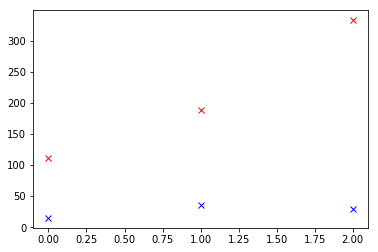

In [7]:
import matplotlib.pyplot as plt
plt.plot(n, 'rx')
plt.plot(m, 'bx')